Team members:

- José Ricardo Munguía Marín A01795660
- Alberto Campos Hernandez A01795645
- Martin Acevedo Pacheco A01794756
- Luis Alejandro Juarez Rodriguez A01795463
- David Alejandro Gutiérrez Valencia A01027771

## TC 5033
### Word Embeddings

<br>

#### Activity 3a: Exploring Word Embeddings with GloVe and Numpy
<br>

- Objective:
    - To understand the concept of word embeddings and their significance in Natural Language Processing.
    - To learn how to manipulate and visualize high-dimensional data using dimensionality reduction techniques like PCA and t-SNE.
    - To gain hands-on experience in implementing word similarity and analogies using GloVe embeddings and Numpy.
    
<br>

- Instructions:
    - Download GloVe pre-trained vectors from the provided link in Canvas, the official public project: 
    Jeffrey Pennington, Richard Socher, and Christopher D. Manning. 2014. GloVe: Global Vectors for Word Representation
    https://nlp.stanford.edu/data/glove.6B.zip

    - Create a dictorionay of the embeddings so that you carry out fast look ups. Save that dictionary e.g. as a serialized file for faster loading in future uses.
    
    - PCA and t-SNE Visualization: After loading the GloVe embeddings, use Numpy and Sklearn to perform PCA and t-SNE to reduce the dimensionality of the embeddings and visualize them in a 2D or 3D space.

    - Word Similarity: Implement a function that takes a word as input and returns the 'n' most similar words based on their embeddings. You should use Numpy to implement this function, using libraries that already implement this function (e.g. Gensim) will result in zero points.

    - Word Analogies: Implement a function to solve analogies between words. For example, "man is to king as woman is to ____". You should use Numpy to implement this function, using libraries that already implement this function (e.g. Gensim) will result in zero points.

    - Submission: This activity is to be submitted in teams of 3 or 4. Only one person should submit the final work, with the full names of all team members included in a markdown cell at the beginning of the notebook.
    
<br>

- Evaluation Criteria:

    - Code Quality (40%): Your code should be well-organized, clearly commented, and easy to follow. Use also markdown cells for clarity.
    
   - Functionality (60%): All functions should work as intended, without errors.
       - Visualization of PCA and t-SNE (10% each for a total of 20%)
       - Similarity function (20%)
       - Analogy function (20%)
|



#### Import libraries

In [ ]:
# Importing Libraries
import torch
import torch.nn.functional as F
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
from numpy.linalg import norm
import pickle

# Setting the seed
plt.style.use('ggplot')

#### Load file

In [2]:
# PATH = '/media/pepe/DataUbuntu/Databases/glove_embeddings/glove.6B.200d.txt'
PATH = './glove_embeddings/glove.6B.300d.txt'
emb_dim = 50

## Diccionario

In [ ]:
# Function to create a dictionary of embeddings
def create_emb_dictionary(path):
    
    # Create an empty dictionary
    embeddings_dict = {}
    
    # Open the file
    with open(path, 'r', encoding='utf-8') as f: 
        
        # Loop through the lines
        for line in f:
            values = line.split()
            word = values[0]
            vector = list(map(float, values[1:]))
            embeddings_dict[word] = vector
            
    # Return the dictionary
    return embeddings_dict

In [ ]:
# Function to get the embedding of a word
embeddings_dict = create_emb_dictionary(PATH)

In [ ]:
# Open and serialize the embeddings dictionary
with open('embeddings_dict_50D.pkl', 'wb') as f:
    pickle.dump(embeddings_dict, f)

## Visualización de Embeddings usando PCA y t-SNE

In [ ]:
# Function to get the embedding of a word
def show_n_first_words(path, n_words):
    
        # Open the file
        with open(path, 'r') as f:
            
            # Loop through the lines
            for i, line in enumerate(f):
                
                # Divide the line into words
                print(line.split(), len(line.split()[1:]))
                
                # Break if we have printed n_words
                if i>=n_words: break

In [7]:
show_n_first_words(PATH, 5)

['the', '0.04656', '0.21318', '-0.0074364', '-0.45854', '-0.035639', '0.23643', '-0.28836', '0.21521', '-0.13486', '-1.6413', '-0.26091', '0.032434', '0.056621', '-0.043296', '-0.021672', '0.22476', '-0.075129', '-0.067018', '-0.14247', '0.038825', '-0.18951', '0.29977', '0.39305', '0.17887', '-0.17343', '-0.21178', '0.23617', '-0.063681', '-0.42318', '-0.11661', '0.093754', '0.17296', '-0.33073', '0.49112', '-0.68995', '-0.092462', '0.24742', '-0.17991', '0.097908', '0.083118', '0.15299', '-0.27276', '-0.038934', '0.54453', '0.53737', '0.29105', '-0.0073514', '0.04788', '-0.4076', '-0.026759', '0.17919', '0.010977', '-0.10963', '-0.26395', '0.07399', '0.26236', '-0.1508', '0.34623', '0.25758', '0.11971', '-0.037135', '-0.071593', '0.43898', '-0.040764', '0.016425', '-0.4464', '0.17197', '0.046246', '0.058639', '0.041499', '0.53948', '0.52495', '0.11361', '-0.048315', '-0.36385', '0.18704', '0.092761', '-0.11129', '-0.42085', '0.13992', '-0.39338', '-0.067945', '0.12188', '0.16707', '0

### Plot some embeddings

In [ ]:
# Visualizes word embeddings by reducing the dimensionality of the embeddings to 2D
def plot_embeddings(emb_path, words2show, emb_dim, embeddings_dict, func=PCA):
    
    # Filter vectors for the specified words in words2show
    vectors = np.array([embeddings_dict[word] for word in words2show if word in embeddings_dict])
    
    # Apply dimensionality reduction to reduce the vectors to 2D
    if func == PCA:
        reduced_vectors = PCA(n_components=2).fit_transform(vectors)
    elif func == TSNE:
        reduced_vectors = TSNE(n_components=2).fit_transform(vectors)
    
    # Plot the reduced embeddings in a 2D scatter plot
    plt.figure(figsize=(10, 10))
    for word, vector in zip(words2show, reduced_vectors):
        
        # Plot each point in the scatter plot
        plt.scatter(vector[0], vector[1])
        plt.text(vector[0] + 0.1, vector[1] + 0.1, word)
        
    plt.title(f'Word Embeddings Visualization using {func.__name__}')
    plt.show()


In [ ]:
words= ['burger', 'tortilla', 'bread', 'pizza', 'beef', 'steak', 'fries', 'chips', 
            'argentina', 'mexico', 'spain', 'usa', 'france', 'italy', 'greece', 'china',
            'water', 'beer', 'tequila', 'wine', 'whisky', 'brandy', 'vodka', 'coffee', 'tea',
            'apple', 'banana', 'orange', 'lemon', 'grapefruit', 'grape', 'strawberry', 'raspberry',
            'school', 'work', 'university', 'highschool']


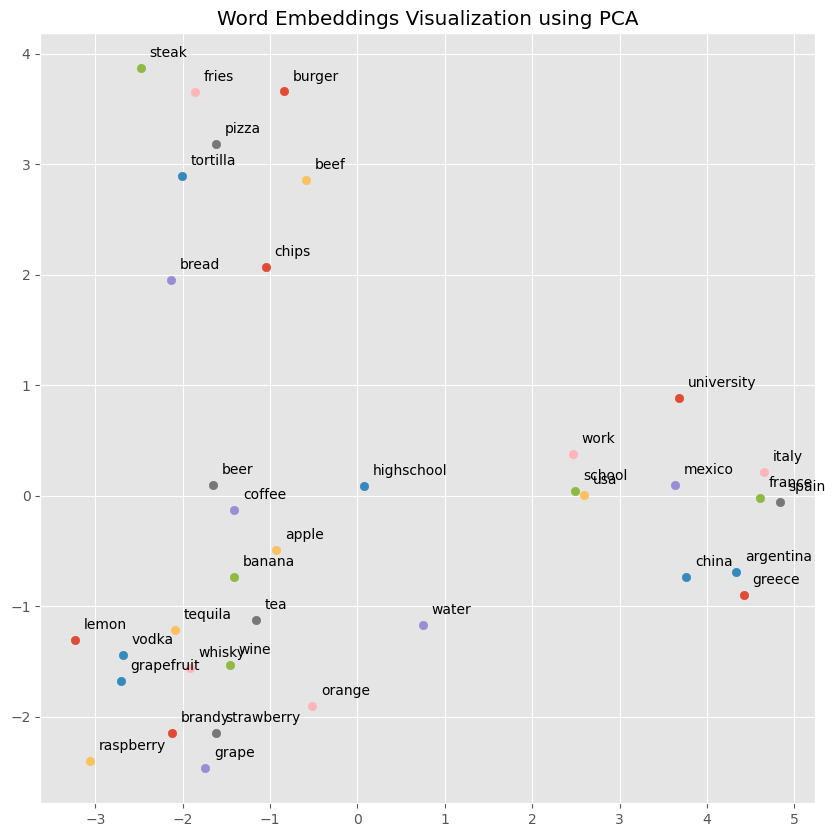

In [ ]:
plot_embeddings(PATH, words, emb_dim, embeddings_dict, PCA)

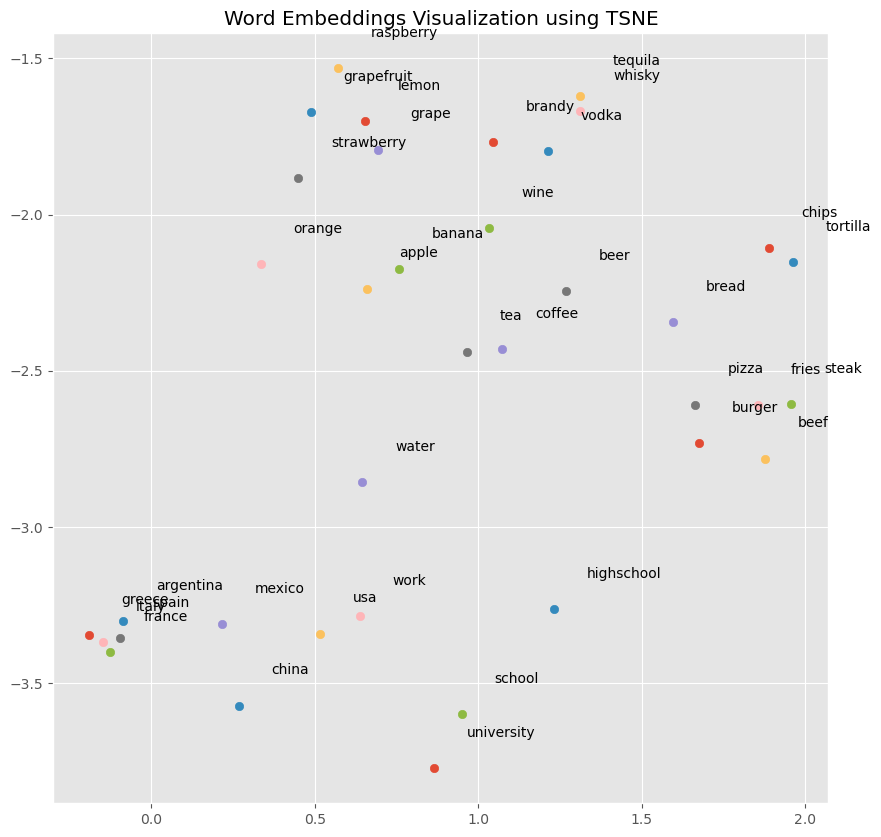

In [ ]:
# Visualizes word embeddings for specified words in 2D using t-SNE
embeddings = plot_embeddings(PATH, words, emb_dim, embeddings_dict, TSNE)

## Función para Analogías de Palabras

In [ ]:
# Defines the analogy function to find the word that completes the analogy
def analogy(word1, word2, word3, embeddings_dict):
    
    # Check if the words are in the embeddings dictionary
    if word1 not in embeddings_dict or word2 not in embeddings_dict or word3 not in embeddings_dict:
        return None
    
    # Retrieve the embeddings vectors fot word1, word2 and word3 from embeddings_dict
    vec1 = np.array(embeddings_dict[word1])
    vec2 = np.array(embeddings_dict[word2])
    vec3 = np.array(embeddings_dict[word3])
    
    # Calculate the analogy vector
    analogy_vector = vec2 - vec1 + vec3
    
    # Initializes a dictionary to store the similarities
    similarities = {}
    
    # Iterates over embeddings_dict to calculate similarity between the analogy vector and each word
    for w, vec in embeddings_dict.items():
        vec = np.array(vec)
        
        # Calculate the cosine similarity between the analogy vector and the current word vector
        sim = np.dot(analogy_vector, vec) / (norm(analogy_vector) * norm(vec))
        
        # Store the similarity in the dictionary
        similarities[w] = sim
        
    # Sort the similarities in descending order
    most_similar = sorted(similarities.items(), key=lambda item: item[1], reverse=True)
    
    # Loop through the most similar words to find the one that completes the analogy
    for word, sim in most_similar:
        if word not in [word1, word2, word3]:
            return word



In [ ]:
# Test the analogy function
analogy('man', 'king', 'woman', embeddings_dict)

'queen'

## Función para Encontrar Palabras Similares

In [ ]:
# Function to find the most similar words to a given word
def find_most_similar(word, embeddings_dict, top_n=10):
    
    # Check if the word is in the embeddings dictionary
    if word not in embeddings_dict:
        return []
    
    # Retrieve the word vector from the embeddings dictionary
    word_vector = embeddings_dict[word]
    
    # Initialize a dictionary to store the similarities
    similarities = {}
    
    # Iterate over embeddings_dict to calculate similarity between the word vector and each word
    for w, vec in embeddings_dict.items():
        
        # Skip the word itself
        if w != word:
            
            # Calculate the cosine similarity between the word_vector and the current word vector
            sim = np.dot(word_vector, vec) / (norm(word_vector) * norm(vec))
            
            # Store the similarity in the dictionary
            similarities[w] = sim
            
    # Sort the similarities in descending order
    most_similar = sorted(similarities.items(), key=lambda item: item[1], reverse=True)[:top_n]
    
    # Return the most similar words
    return most_similar

In [ ]:
# Test the find_most_similar function
most_similar = find_most_similar('mexico', embeddings_dict)

In [ ]:
# Print the most similar words
for i, w in enumerate(most_similar, 1):
    print(f'{i} ---> {w[0]}')

1 ---> mexican
2 ---> venezuela
3 ---> colombia
4 ---> guatemala
5 ---> peru
6 ---> chile
7 ---> argentina
8 ---> veracruz
9 ---> brazil
10 ---> america
